# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=xyymDGReKdY&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26) [[Notebook]](t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Popular Pretrained Neural Networks for Keras [[Video]](https://www.youtube.com/watch?v=CEFcwpBneFo&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=27) [[Notebook]](t81_558_class_09_2_popular_transfer.ipynb)
* Part 9.3: Transfer Learning for Computer Vision and Keras [[Video]](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28) [[Notebook]](t81_558_class_09_3_transfer_cv.ipynb)
* **Part 9.4: Transfer Learning for Languages and Keras** [[Video]](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28) [[Notebook]](t81_558_class_09_4_transfer_nlp.ipynb)
* Part 9.5: Transfer Learning for Keras Feature Engineering [[Video]](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28) [[Notebook]](t81_558_class_09_5_transfer_feature_eng.ipynb)

# Part 9.4: Transfer Learning for Languages and Keras

Transfer learning is commonly used with Natural Language Processing (NLP).  This course has an entire module that covers NLP.  However, for now we will look how a NLP network can be loaded into Keras for transfer learning.  The following three sources were helpful for the creation of this section.

* Cer, D., Yang, Y., Kong, S. Y., Hua, N., Limtiaco, N., John, R. S., ... & Sung, Y. H. (2018). [Universal sentence encoder](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175.
* [Deep Transfer Learning for Natural Language Processing — Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial - How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to easily be loaded into TensorFlow.  To install TensorHub use the following command.

In [ ]:
!pip install tensorflow_hub

It is also necessary to install TensorFlow Datasets.  This can be done with the following command.

In [ ]:
!pip install tensorflow_datasets

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH

Load the Internet Movie DataBase (IMDB) reviews data set.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This was trained by Google on gnews data and can convert RAW text into vectors.  

In [2]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Consider the following 3 movie reviews.

In [3]:
train_examples[:3]

array([b"I absolutely LOVED this movie when I was a kid. I cried every time I watched it. It wasn't weird to me. I totally identified with the characters. I would love to see it again (and hope I wont be disappointed!). Pufnstuf rocks!!!! I was really drawn in to the fantasy world. And to me the movie was loooong. I wonder if I ever saw the series and have confused them? The acting I thought was strong. I loved Jack Wilde. He was so dreamy to an 10 year old (when I first saw the movie, not in 1970. I can still remember the characters vividly. The flute was totally believable and I can still 'feel' the evil woods. Witchy poo was scary - I wouldn't want to cross her path.",
       b'A very close and sharp discription of the bubbling and dynamic emotional world of specialy one 18year old guy, that makes his first experiences in his gay love to an other boy, during an vacation with a part of his family.<br /><br />I liked this film because of his extremly clear and surrogated storytelling 

The embedding layer can convert each to 20-number vectors.

In [4]:
hub_layer(train_examples[:3])

<tf.Tensor: id=309, shape=(3, 20), dtype=float32, numpy=
array([[ 2.0660517 , -4.491833  ,  3.6127415 , -0.6699504 , -7.310619  ,
        -4.402696  , -4.3286967 ,  2.5536625 ,  5.506356  ,  1.5327201 ,
        -4.539875  ,  0.2960692 ,  1.5209124 ,  1.1145658 , -6.6717415 ,
         3.1345682 ,  5.0351944 , -2.2035742 , -3.4724264 , -0.7029331 ],
       [ 2.2850306 , -1.3994653 ,  1.9646566 , -1.8079202 , -0.3574569 ,
        -0.12123204, -0.82485604,  0.20197354,  2.4308808 , -1.8707466 ,
        -1.8008713 ,  0.9650812 , -1.3530476 , -0.10591842, -2.7889197 ,
         0.69957316,  2.0551753 , -1.6120912 , -2.8612442 , -0.7083347 ],
       [ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ]],
      dtype=float32)>

We add addition layers to attempt to classify the movie reviews as either positive or negative.

In [5]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Compile the neural network.

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Split and train the neural network.

In [7]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 147us/sample - loss: 0.8996 - accuracy: 0.5348 - val_loss: 0.7075 - val_accuracy: 0.5826
Epoch 2/40
15000/15000 [==============================] - 2s 119us/sample - loss: 0.6725 - accuracy: 0.5999 - val_loss: 0.6488 - val_accuracy: 0.6217
Epoch 3/40
15000/15000 [==============================] - 2s 115us/sample - loss: 0.6324 - accuracy: 0.6427 - val_loss: 0.6163 - val_accuracy: 0.6603
Epoch 4/40
15000/15000 [==============================] - 2s 114us/sample - loss: 0.5967 - accuracy: 0.6821 - val_loss: 0.5823 - val_accuracy: 0.6916
Epoch 5/40
15000/15000 [==============================] - 2s 116us/sample - loss: 0.5579 - accuracy: 0.7186 - val_loss: 0.5474 - val_accuracy: 0.7224
Epoch 6/40
15000/15000 [==============================] - 2s 114us/sample - loss: 0.5190 - accuracy: 0.7516 - val_loss: 0.5132 - val_accuracy: 0.7492
Epoch 7/40
15000/15000 [==========================

In [ ]:
Evaluate the neural network.

In [9]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 3s 116us/sample - loss: 0.4037 - accuracy: 0.8580
[0.4036788517403603, 0.85804]


In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

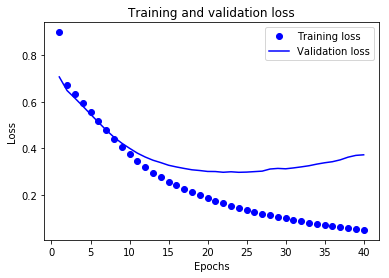

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

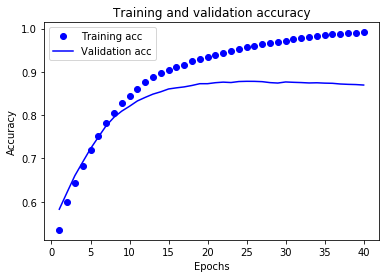

In [12]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()